### A Wigner-Function Formulation of Finite-State Quantum Mechanics - Wootters, 1986

En su trabajo de 1986 Wootters introduce una versión discreta de la función Wigner para sistemas de dimensión finita. Wootters considera un sistema que tiene $N$ estados ortogonales, y construye un espacio de fase discreto para el caso en que $N$ es primo, a partir de la estructura de espacio vectorial de dimensión dos sobre un campo finito $\mathbb Z_N$. Para $N$ compuesto, se considera un sistema compuesto por varios sub-sistemas de dimensión primo, correspondiente a la descomposición en factores primos de $N = n_1n_2 \cdot n_k$, luego el espacio de fase discreto corresponde a un producto cartesiano de los espacios de fase para cada sub-sistema.

La ventaja de éste primer intento de Wootters es su sencillez. La construcción es análoga al caso continuo, pues se definen los operadores puntuales sobre espacios de dimensión finita que satisfacen las propiedades análogas a los operadores puntuales en la caso continuo. De ahí solo es cuestión tomar la traza con la matriz de densidad de un estado para obtener la función de Wigner.

La desventaja principal que vemos de éste método es que la función de Wigner para sistemas compuestos requiere de un producto cartesiano de los espacios de fase discretos, lo cual limita la utilidad de la representación del estado cuántico. En éste notebook buscamos replicar el trabajo de Wootters de 1986, en preparación de su versión más completa, donde se utilizan extensiones de Galois para representar sistemas compuestos (con sub-sistemas de tamaño primo $r$) en un solo espacio de fase de dos dimensiones.

---

Como primer ejemplo, consideremos el caso más sencillo: el de una partícula con spin-$1/2$. Para éste caso el espacio de Hilbert es $\mathcal H = \mathbb C^2$ y el espacio de fase discreto será $\mathbb Z_2 \times \mathbb Z_2$.

In [320]:
reset()
Z2 = Integers(2)
z2 = list(Z2)
print(Z2)

Ring of integers modulo 2


Siguiendo a Wootters, los operadores puntuales están dados por la fórmula:

$$
\hat{A}(a_1,a_2)
= \frac{1}{2} \left[
(-1)^{a_1} \hat{\sigma}_z + (-1)^{a_2} \hat{\sigma}_x + (-1)^{a_1+a_2} \hat{\sigma}_y + \hat{I}
\right],
$$

donde $\hat{\sigma}_x, \hat{\sigma}_y$ y $\hat{\sigma}_z$ son los operadores de Pauli. Ésto es un caso particular de sistemas de dimensión dos, correspondiente a anillos de característica dos.

In [321]:
X  = Matrix(CDF, [[0,1],[1,0]])
Y  = Matrix(CDF, [[0,-I],[I,0]])
Z  = Matrix(CDF, [[1,0],[0,-1]])
Id = Matrix(CDF, [[1,0],[0,1]])

In [322]:
def A(a1,a2):
    return ( (-1)^a1*Z + (-1)^a2*X + (-1)^(a1+a2)*Y + Id )/2

Los $N^2$ operadores puntuales forman una base para el espacio de operadores $\mathcal M_{N \times N}(\mathbb C)$, por lo tanto toda matriz $N \times N$ puede ser expresada en términos de los operadores, en particular, lo podemos hacer para la matriz de densidad $\hat{\rho}$:

$$
\hat{\rho}
= \sum_{\alpha} W_\alpha \hat{A}(\alpha).
$$

Dado que para cualesquiera dos puntos $\alpha, \beta \in \mathbb Z_N \times \mathbb Z_N$ tenemos

$$
\text{Tr}(\hat{A}_\alpha \hat{A}_\beta)
= N \delta^\alpha_\beta,
$$

podemos obtener los coeficientes $W_\alpha$, los cuales nos darán la función de Wigner discreta:

$$
\text{Tr}(\hat{\rho} \hat{A}_\beta)
= \text{Tr}\left(
\sum_{\alpha} W_\alpha \hat{A}(\alpha)
\hat{A}(\beta)
\right)
= \sum_{\alpha} W_\alpha \text{Tr}(\hat{A}_\alpha \hat{A}_\beta)
= \sum_{\alpha} W_\alpha N \delta^\alpha_\beta
= N W_\beta,
$$

es decir la función de Wigner es $W_\alpha = \frac{1}{N} \text{Tr}(\hat{\rho}\hat{A}_\alpha)$.

In [323]:
def Wigner(rho):
    n = rho.nrows()
    W = Matrix(CDF, n)
    for i in Z2:
        for j in Z2:
            W[i,j] = (rho * A(i,j)).trace() / n
    return W
#     return Matrix(list(list(x) for x in zip(*W))[::-1]) # desplaza los elementos de W a la izquierda

Función de Wigner para el eigenestado de $\hat{\sigma}_z$ con $\lambda = 1$:

In [324]:
v = vector([1,0])
σz = v.tensor_product(conjugate(v))
Wigner(σz)

[0.5 0.5]
[0.0 0.0]

Función de Wigner para el eigenestado de $\hat{\sigma}_x$ con $\lambda = 1$:

In [325]:
v = vector([1/sqrt(2),1/sqrt(2)])
σx = v.tensor_product(conjugate(v))
Wigner(σx)

[0.5 0.0]
[0.5 0.0]

El eigenestado de $\hat{\sigma}_y$ con $\lambda = 1$:

In [326]:
v = vector([-I/sqrt(2),1/sqrt(2)])
σy = v.tensor_product(conjugate(v))
Wigner(σy)

[0.5 0.0]
[0.0 0.5]

El estado mixto $\hat{\rho} = \hat{I} / 2$:

In [327]:
Wigner(matrix.identity(2)/2)

[0.25 0.25]
[0.25 0.25]

El $(+1)$-eigenestado de $(\hat{\sigma}_z + \hat{\sigma}_x) / \sqrt 2$:

In [328]:
v = vector([1, sqrt(2) - 1])
v = v / v.norm()
vv = v.tensor_product(v)
Wigner(vv)

[  0.6035533905932738   0.2500000000000001]
[ 0.24999999999999994 -0.10355339059327377]

El $(-1)$-eigenestado de $(\hat{\sigma}_x + \hat{\sigma}_y + \hat{\sigma}_z)/\sqrt 3$:

In [329]:
v = vector([1, -(1/2*I + 1/2)*sqrt(3) - 1/2*I - 1/2])
v = v / v.norm()
vv = v.tensor_product(conjugate(v))
Wigner(vv)

[-0.1830127018922193  0.3943375672974063]
[ 0.3943375672974064  0.3943375672974064]

Todos nuestros cálculos han funcionado correctamente! Rapidamente gráficamos las funciones de Wigner.

In [330]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style='white')

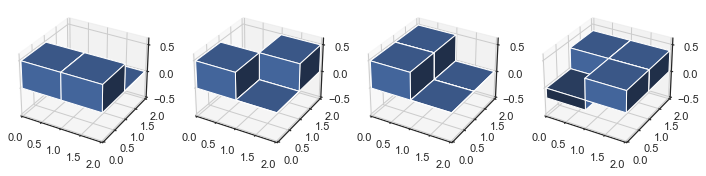

In [331]:
fig = plt.figure(figsize=(12,3))

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

for ax in [ax1, ax2, ax3, ax4]:
    ax.axes.set_xlim3d(left=0, right=2) 
    ax.axes.set_ylim3d(bottom=0, top=2) 
    ax.axes.set_zlim3d(bottom=-0.5, top=0.6) 

x = np.array([[i] * 2 for i in range(2)]).ravel()
y = np.array([i for i in range(2)] * 2)
z = np.zeros(2*2)
dx = np.ones(2*2)
dy = np.ones(2*2)

dz = np.array(np.real(Wigner(σx))).ravel()
ax1.bar3d(x, y, z, dx, dy, dz)

dz = np.array(np.real(Wigner(σy))).ravel()
ax2.bar3d(x, y, z, dx, dy, dz)

dz = np.array(np.real(Wigner(σz))).ravel()
ax3.bar3d(x, y, z, dx, dy, dz)

dz = np.array(np.real(Wigner(vv))).ravel()
ax4.bar3d(x, y, z, dx, dy, dz)

<AxesSubplot:>

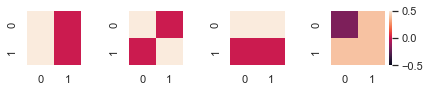

In [332]:
fig = plt.figure(figsize=(7,1))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

sns.heatmap(np.real(Wigner(σx)), ax=ax1, cbar=False, vmin=-0.5, vmax=0.5, square=True)
sns.heatmap(np.real(Wigner(σy)), ax=ax2, cbar=False, vmin=-0.5, vmax=0.5, square=True)
sns.heatmap(np.real(Wigner(σz)), ax=ax3, cbar=False, vmin=-0.5, vmax=0.5, square=True)
sns.heatmap(np.real(Wigner(vv)), ax=ax4, vmin=-0.5, vmax=0.5, square=True)

Ahora vamos a construir la función de Wigner discreta siguiendo a Wootters para el caso $N > 2$ con $N$ primo. En éstos casos, los operadores puntuales están dados matricialmente por

$$
(A_\alpha)_{kl}
= \delta^{2a_1}_{k+l} e^{(2\pi i / N) a_2 (k - l)},
$$

donde las operaciones son módulo $N$.

In [333]:
def kdelta(x,y):
    if x == y:
        return 1
    return 0

In [334]:
def A(a1, a2, N):
    if N < 3:
        raise Exception('N debe ser mayor que 2.')

    A = Matrix(CDF, N)
    ZN = Integers(N)
    for k in ZN:
        for l in ZN:
            A[k, l] = kdelta(2*a1, k+l)*exp((2*pi*I / N)*Integer(a2*(k-l)))
    return A

In [335]:
def Wigner(rho):
    n = rho.nrows()
    W = Matrix(CDF, n)
    ZN = Integers(n)
    for i in ZN:
        for j in ZN:
            W[i,j] = (rho * A(i,j,n)).trace() / n
    return W
#     return Matrix(list(list(x) for x in zip(*W))[::-1]) # desplaza los elementos de W a la izquierda

Nuestra función nos brinda la función de Wigner correcta para el estado completamente mixto $\hat{I}/3$:

In [336]:
Wigner(matrix.identity(CDF, 3)/3)

[0.1111111111111111 0.1111111111111111 0.1111111111111111]
[0.1111111111111111 0.1111111111111111 0.1111111111111111]
[0.1111111111111111 0.1111111111111111 0.1111111111111111]

En el caso $N=2$ había una interpretación directa de los ejes respecto a los observables cuánticos. Para el caso $N > 2$ Wootters da interpretación a partir de los proyectores definidos a traves de las lineas del espacio de fase discreto. Específicamente, los eigenestados del observable del eje horizontal $\hat{O}_1$ están definidos por los los $\hat{P}_\lambda$'s para la linea vertical $\lambda$:

$$
\hat{P}_\lambda = \frac{1}{N} \sum_{\alpha \in \lambda} \hat{A}_\alpha,
$$

y los eigenvalores asignados a éstas lineas verticales son los valores de $a_1$. Con ésto construímos el operador $\hat{O}_1$ como

$$
\hat{O}_1
= \frac{1}{N} \sum_{\alpha} a_1 \hat{A}_\alpha.
$$

Similarmente para eje vertical el observable correspondiente está dado por

$$
\hat{O}_2
= \frac{1}{N} \sum_{\alpha} a_2 \hat{A}_\alpha.
$$

In [337]:
# proyector correspondiente a la linea diagonal del espacio de fase
Z3 = Integers(3)
p = Matrix(CDF, 3)
for a in Z3:
    p += A(a, a, 3) / 3

In [338]:
Wigner(p)

[    0.3333333333333333                    0.0                    0.0]
[                   0.0     0.3333333333333333 -1.850371707708594e-17]
[                   0.0 -1.850371707708594e-17     0.3333333333333333]

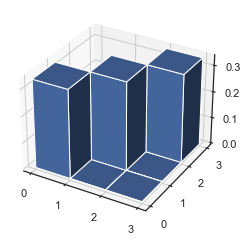

In [339]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111, projection='3d')

N = 3

x = np.array([[i] * N for i in range(N)]).ravel()
y = np.array([i for i in range(N)] * N)
z = np.zeros(N*N)
dx = np.ones(N*N)# / 1.05
dy = np.ones(N*N)# / 1.05

dz = np.array(np.real(Wigner(p))).ravel()
ax1.bar3d(x, y, z, dx, dy, dz)